In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pysentani import *
import sentani as sti
survey = find_survey("../data-anonymous")

../data-anonymous/sentani-merged-cleaned-anonymous-2014-11-29.xlsx


In [2]:
survey['access_type'] = survey['village_name'].apply(lambda x: sti.access_map.get(x))

In [4]:
frequency = {'genset_expenditure':'daily'}

multiplier = {'daily':30}

# creates monthly calculation for genset_expenditure
for column in frequency.keys():
    # adjust expenditure frequency
    expenditure = survey[column] * multiplier[frequency[column]]
    new_column = column + '_monthly'
    survey[new_column] = expenditure
    
# monthly expenditure divided by 960 rp per kWh (.08 USD per kWh * 12000 rp to USD exchange)
# 12000 rp to 1 usd was the exchange rate at time of survey
def genset_kwh_conversion(cv):
    converted = (cv['genset_expenditure_monthly']/(960))
    return converted

survey['genset_kWh'] = survey.apply(genset_kwh_conversion, axis=1)

# kWh multiplied by U.S. EIA estimation of distillate oil (No. 2) CO2 emissions (757.5g/kWh).
# http://www.eia.gov/tools/faqs/faq.cfm?id=74&t=11
def CO2_emission(cv):
    converted = cv['genset_kWh']*757.5 
    return converted

survey['diesel_CO2'] = survey.apply(CO2_emission, axis=1)

# Potential Photovoltaic CO2 production consumption of 105g CO2 per kWh(lifetime) as estimated by BlueSkyModel.org
# http://blueskymodel.org/kilowatt-hour
def PV_CO2(cv):
    converted = cv['genset_kWh']*105
    return converted

survey['PV_CO2'] = survey.apply(PV_CO2, axis=1)

In [5]:
df = survey.groupby(['access_type','village_name'])[['genset_expenditure_monthly','genset_kWh','diesel_CO2','PV_CO2']].mean().dropna()

In [6]:
df.reset_index(inplace=True)
df

,access_type,village_name,genset_expenditure_monthly,genset_kWh,diesel_CO2,PV_CO2
0,PLN_grid,Hobong,15000000.000000,15625.000000,11835937.500000,1640625.000000
1,PLN_grid,Khamayakha,1425000.000000,1484.375000,1124414.062500,155859.375000
2,PLN_microgrid,Ayapo,1115789.473684,1162.280702,880427.631579,122039.473684
3,community_microgrid,Atamali,4500000.000000,4687.500000,3550781.250000,492187.500000
4,no_access,Abar,1200000.000000,1250.000000,946875.000000,131250.000000
5,no_access,Ebunfauw,988888.888889,1030.092593,780295.138889,108159.722222
6,no_access,Kalio,1150000.000000,1197.916667,907421.875000,125781.250000
7,no_access,Kampung_Baru,1280000.000000,1333.333333,1010000.000000,140000.000000
8,no_access,Khageuw,1050000.000000,1093.750000,828515.625000,114843.750000
9,no_access,Puai,1419285.714286,1478.422619,1119905.133929,155234.375000


In [7]:
df.columns

Index(['access_type', 'village_name', 'genset_expenditure_monthly',
       'genset_kWh', 'diesel_CO2', 'PV_CO2'],
      dtype='object')

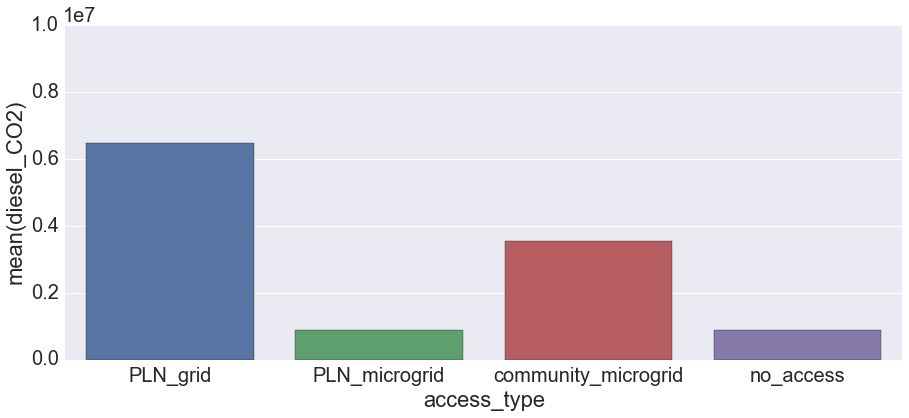

In [8]:
sns.set(font_scale = 2)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots()

ax = sns.barplot(x='access_type', y='diesel_CO2',ci=None, data=df)

plt.ylim(0,1e7)
locs, labels = plt.xticks()

# The graph above represents the monthly mean of CO2 measured in g/kWh emitted by diesel generators in Lake Sentani, separated by access type.

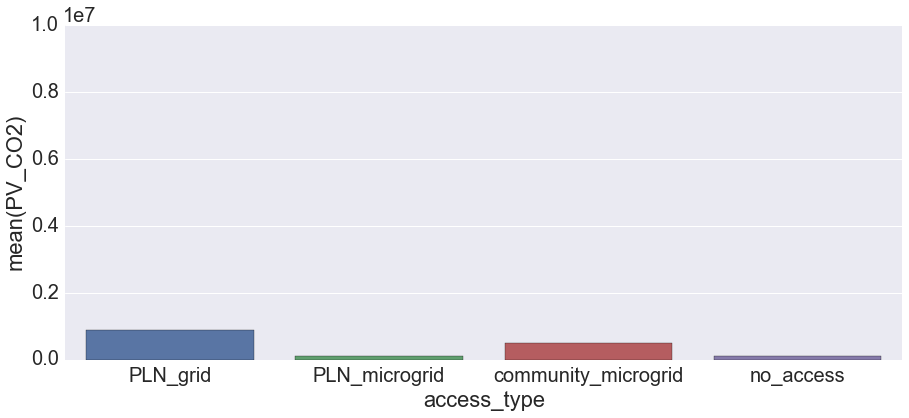

In [9]:
sns.set(font_scale = 2)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots()

ax = sns.barplot(x='access_type', y='PV_CO2', ci=None, data=df)

plt.ylim(0,1e7)
locs, labels = plt.xticks()

#This graph represents the amount of CO2 that would be created by PV systems necessary to replace existing diesel generators in Lake Sentani. Measurement is calculated as a monthly mean of g/kWh separated by grid type. 

#Essentially, the calculated reduction would be 86% (105/757.5 = .1386, 1.00 - .1386= .8614)  Of course, this is an intuitive conclusion but the purpose is to demonstrate how much CO2 can be eliminated in Lake Sentani by implementing PV microgrids.

In [10]:
#verification
df.groupby('access_type')['diesel_CO2'].describe()

access_type               
PLN_grid             count           2.000000
                     mean      6480175.781250
                     std       7574190.859495
                     min       1124414.062500
                     25%       3802294.921875
                     50%       6480175.781250
                     75%       9158056.640625
                     max      11835937.500000
PLN_microgrid        count           1.000000
                     mean       880427.631579
                     std                  NaN
                     min        880427.631579
                     25%        880427.631579
                     50%        880427.631579
                     75%        880427.631579
                     max        880427.631579
community_microgrid  count           1.000000
                     mean      3550781.250000
                     std                  NaN
                     min       3550781.250000
                     25%       3550781.250000
       

In [11]:
#verification
df.groupby('access_type')['PV_CO2'].describe()

access_type               
PLN_grid             count          2.000000
                     mean      898242.187500
                     std      1049887.841910
                     min       155859.375000
                     25%       527050.781250
                     50%       898242.187500
                     75%      1269433.593750
                     max      1640625.000000
PLN_microgrid        count          1.000000
                     mean      122039.473684
                     std                 NaN
                     min       122039.473684
                     25%       122039.473684
                     50%       122039.473684
                     75%       122039.473684
                     max       122039.473684
community_microgrid  count          1.000000
                     mean      492187.500000
                     std                 NaN
                     min       492187.500000
                     25%       492187.500000
                     50%    

In [17]:
105/757.5

0.13861386138613863

In [18]:
1.00-.1386

0.8613999999999999